In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/statistical-learning-dataset/cs1.csv


In [2]:
df=pd.read_csv("/kaggle/input/statistical-learning-dataset/cs1.csv")
df.head()

,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


## Income Vs gender:Two sample t test

In [3]:
male=df[df["gender"]=="MALE"]
female=df[df["gender"]=="FEMALE"]

In [4]:
male.income.mean()

27082.06017647058

In [5]:
female.income.mean()

27435.078875000014

In [6]:
## 1) the sample is drawn highly randomised
## 2) normality of income

## checking the normality of "income" distribution

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

***Stating of Hypothesis:
H0:mu_male=mu_female
H1:mu_male!=mu_female***

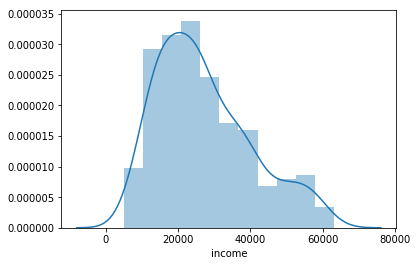

In [8]:
sns.distplot(df["income"])

In [9]:
import scipy.stats as st


In [10]:
df.income.describe()

count      330.000000
mean     27253.220758
std      13065.326534
min       5014.210000
25%      17149.675000
50%      24718.250000
75%      35523.750000
max      63130.100000
Name: income, dtype: float64

In [11]:
st.shapiro(df.income)

(0.9428609013557434, 5.541547221099563e-10)

**Since p value is less than alpha (5%) so the distribution does not follow normality.
Hence we do non parametric test:mannwhitney u**

In [12]:
st.mannwhitneyu(male.income,female.income)

MannwhitneyuResult(statistic=13394.0, pvalue=0.40623189504528334)

**Assume the income follows normal
Check for variance of male income and female income**

In [13]:
st.levene(male.income,female.income)

LeveneResult(statistic=0.004552939368501236, pvalue=0.9462442998451014)

In [14]:
# since p value is greater than alpha(5%) accept H0; means variance of male income and female income are same.


In [15]:
st.ttest_ind(male.income,female.income)

Ttest_indResult(statistic=-0.2449534813001663, pvalue=0.8066456277315542)

Conclusion: Both male and female income are same.

## Income vs Married (Two sample t-test)

In [16]:
Yes=df[df["married"]=="YES"]
No=df[df["married"]=="NO"]

In [17]:
st.mannwhitneyu(Yes.income,No.income)

MannwhitneyuResult(statistic=12121.0, pvalue=0.3627699902044943)

In [18]:
st.levene(Yes.income,No.income)

LeveneResult(statistic=0.8769809445218552, pvalue=0.3497188967565381)

In [19]:
st.ttest_ind(Yes.income,No.income)

Ttest_indResult(statistic=-0.5022263858475209, pvalue=0.6158452714913527)

## Income Vs Pl

In [20]:
ipl=df[df["pl"]=="YES"]

inpl=df[df["pl"]=="NO"]

In [21]:
st.mannwhitneyu(ipl.income,inpl.income)

MannwhitneyuResult(statistic=9201.0, pvalue=3.7157568216019294e-07)

In [22]:
st.levene(ipl.income,inpl.income)

LeveneResult(statistic=12.304069050382678, pvalue=0.00051499743947121)

In [23]:
st.ttest_ind(ipl.income,inpl.income)

Ttest_indResult(statistic=5.47425610162424, pvalue=8.746969284908934e-08)

**The income of people who have taken pl is not same as income of people who have not taken pl.**

## Income vs region

Stating of Hypothesis:
H0:mu_R1=mu_R2=mu_R3=mu_R4
H1:mu_R1!=mu_R2!=mu_R3!=mu_R4

In [24]:
## Assumptions : 1.Randomness 2.Normality 3.Variance equality
## 1. assumed randomness
## 2. Normality is already checked,assume for a while it follows noemal
## 3. Variance equality (need to check)

In [25]:
df.region.unique()

array(['INNER_CITY', 'TOWN', 'RURAL', 'SUBURBAN'], dtype=object)

In [26]:
iic=df[df["region"]=="INNER_CITY"]["income"]
it=df[df["region"]=="TOWN"]["income"]
ir=df[df["region"]=="RURAL"]["income"]
isu=df[df["region"]=="SUBURBAN"]["income"]


In [27]:
st.levene(iic,it,ir,isu)

LeveneResult(statistic=1.2652880368775907, pvalue=0.28625499005988436)

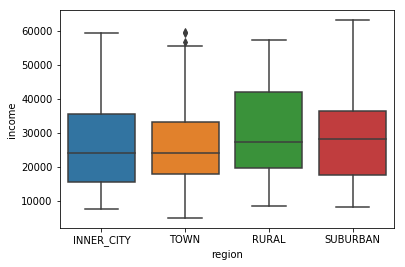

In [28]:
sns.boxplot(x="region",y="income",data=df)

In [29]:
st.f_oneway(iic,it,ir,isu)

F_onewayResult(statistic=1.2950173064832669, pvalue=0.27607567314467585)

In [30]:
## since income is not satisfied the normality, we should do kruskal wallis test

In [31]:
st.kruskal(iic,it,ir,isu)

KruskalResult(statistic=3.804997746690219, pvalue=0.2833053439297466)

## Income Vs Children

Stating of Hypothesis:
H0:mu_c0=mu_c1=mu_c2=mu_c3
H1:mu_c0!=mu_c1!=mu_c2!=mu_c3

In [32]:
c0=df[df["children"]==0]["income"]
c1=df[df["children"]==1]["income"]
c2=df[df["children"]==2]["income"]
c3=df[df["children"]==3]["income"]


In [33]:
st.levene(c0,c1,c2,c3)

LeveneResult(statistic=0.476792334169421, pvalue=0.6986500699569995)

In [34]:
st.f_oneway(c0,c1,c2,c3)

F_onewayResult(statistic=0.5667851690722862, pvalue=0.6372599526845)

**The income of people who have children is same as income of people who have no children.**

## Categorical vs Categorical

### Pl Vs gender
H0: There is no association between Pl status and gender
H1: There is an assosiation between Pl status and gender

In [35]:
## Z proportion test
from statsmodels.stats.proportion import proportions_ztest

In [36]:
tab=pd.crosstab(df["pl"],df["gender"])
tab

gender,FEMALE,MALE
pl,,
NO,98,84
YES,62,86


In [37]:
proportions_ztest([86,62],[170,160])

(2.1610351850000873, 0.03069262159535531)

In [38]:
tab.loc["YES"]

gender
FEMALE    62
MALE      86
Name: YES, dtype: int64

In [39]:
proportions_ztest(tab.loc["YES"],tab.sum(axis=0))

(-2.1610351850000873, 0.03069262159535531)

In [40]:
st.chi2_contingency(tab)

(4.203725620315687, 0.040335270903050835, 1, array([[88.24242424, 93.75757576],
        [71.75757576, 76.24242424]]))

## Pl vs Marital status

In [41]:
tab1=pd.crosstab(df["pl"],df["married"])
tab1

married,NO,YES
pl,,
NO,53,129
YES,63,85


In [42]:
proportions_ztest([63,85],[116,214])

(2.544503091931482, 0.01094333429153045)

In [43]:
st.chi2_contingency(tab1)

(5.898041621988204,
 0.015157729377672154,
 1,
 array([[ 63.97575758, 118.02424242],
        [ 52.02424242,  95.97575758]]))

## Pl,income and Car

In [44]:
from statsmodels.formula.api import ols

In [45]:
df = pd.get_dummies(df,columns=["pl","car"],drop_first=True)


In [46]:
lin_model=ols("income~pl_YES+car_YES",data=df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     17.03
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.21e-08
Time:                        11:39:28   Log-Likelihood:                -3579.0
No. Observations:                 330   AIC:                             7164.
Df Residuals:                     327   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.256e+04   1134.376     19.889      0.000    2.03e+04    2.48e+04
pl_YES      7621.2728   1380.538      5.521      0.000    4905.417    1.03e+04
car_YES     2693.0784   1375.238      1.958      0.051     -12.352    5398.508
==============================================================================
Omnibus:                       21.000   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.887
Skew:                           0.655   Prob(JB):                     6.50e-06
Kurtosis:                       2.856   Cond. No.                         3.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Two-Way Anova

In [47]:
from statsmodels.stats.anova import anova_lm

In [48]:
formula = 'income ~ pl_YES + car_YES'
model = ols(formula,df).fit()
aov_table = anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
pl_YES,4.740390e+09,1.0,30.476043,6.894362e-08
car_YES,5.964827e+08,1.0,3.834796,5.104898e-02
Residual,5.086315e+10,327.0,NaN,NaN


In [49]:
model1 = ols('income ~ pl_YES + car_YES',data = df).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     17.03
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.21e-08
Time:                        11:39:28   Log-Likelihood:                -3579.0
No. Observations:                 330   AIC:                             7164.
Df Residuals:                     327   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.256e+04   1134.376     19.889      0.000    2.03e+04    2.48e+04
pl_YES      7621.2728   1380.538      5.521      0.000    4905.417    1.03e+04
car_YES     2693.0784   1375.238      1.958      0.051     -12.352    5398.508
==============================================================================
Omnibus:                       21.000   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.887
Skew:                           0.655   Prob(JB):                     6.50e-06
Kurtosis:                       2.856   Cond. No.                         3.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
from scipy.stats import f

In [51]:
f.sf(17.03,2,327)

9.21147731722649e-08